In [1]:
import pandas as pd
from datetime import datetime, timedelta, time
import numpy as np
from scipy.ndimage.interpolation import shift
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

import calendar

In [2]:
df = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_181229.txt')

In [3]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,03:00:00,REGULAR,6881995,2333630
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,07:00:00,REGULAR,6882006,2333643
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,11:00:00,REGULAR,6882062,2333740
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,15:00:00,REGULAR,6882243,2333800
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/22/2018,19:00:00,REGULAR,6882590,2333868


In [4]:
#Check data types 
df.dtypes

C/A                                                                     object
UNIT                                                                    object
SCP                                                                     object
STATION                                                                 object
LINENAME                                                                object
DIVISION                                                                object
DATE                                                                    object
TIME                                                                    object
DESC                                                                    object
ENTRIES                                                                  int64
EXITS                                                                    int64
dtype: object

In [5]:
#Convert DATES to a datetime object
df['DATE'] =  pd.to_datetime(df['DATE'])

In [6]:
#Clean columns "EXITS" can't referenced because of space
df = df.rename(columns=lambda x: x.strip())

In [7]:
#Create column for day reference
df['DAY'] = df['DATE'].dt.weekday_name

In [8]:
#Create MONTH colomn 
df['MONTH']=df['DATE'].dt.month

In [9]:
df['STAT_TOT']= df['STATION']+df['SCP']

In [10]:
df['ALPHA']= df['DATE'].astype(str)+df['TIME'].astype(str)+df['STAT_TOT'].astype(str)


In [11]:
df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DAY,MONTH,STAT_TOT,ALPHA
201169,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2018-12-28,11:12:57,REGULAR,5554,366,Friday,12,RIT-ROOSEVELT00-05-01,2018-12-2811:12:57RIT-ROOSEVELT00-05-01
201170,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2018-12-28,12:00:00,REGULAR,5554,366,Friday,12,RIT-ROOSEVELT00-05-01,2018-12-2812:00:00RIT-ROOSEVELT00-05-01
201171,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2018-12-28,12:19:32,REGULAR,5554,366,Friday,12,RIT-ROOSEVELT00-05-01,2018-12-2812:19:32RIT-ROOSEVELT00-05-01
201172,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2018-12-28,16:00:00,REGULAR,5554,366,Friday,12,RIT-ROOSEVELT00-05-01,2018-12-2816:00:00RIT-ROOSEVELT00-05-01
201173,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2018-12-28,20:00:00,REGULAR,5554,366,Friday,12,RIT-ROOSEVELT00-05-01,2018-12-2820:00:00RIT-ROOSEVELT00-05-01


In [12]:
df=df.groupby(['ALPHA'])

In [13]:
df['TRAFFIC']=df['ENTRIES']+df['EXITS']

TypeError: unsupported operand type(s) for +: 'SeriesGroupBy' and 'SeriesGroupBy'

In [22]:
df['TRAF_DELTA'] = df['TRAFFIC'].diff().abs()

In [23]:
df_day=df.groupby(['DAY'])['TRAF_DELTA'].sum().reset_index()

In [24]:
df_day['DAY'] = pd.Categorical(df_day['DAY'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)

In [25]:
print(df_day)

         DAY    TRAF_DELTA
0     Friday  3.054958e+07
1     Monday  1.426428e+07
2   Saturday  5.858780e+11
3     Sunday  6.215116e+06
4   Thursday  9.041341e+06
5    Tuesday  1.555471e+07
6  Wednesday  8.716222e+06


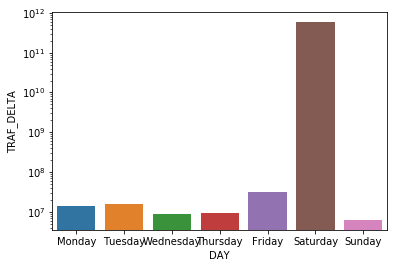

In [27]:
plot1=sns.barplot(x = 'DAY',y='TRAF_DELTA',data=df_day);
plot1.set_yscale('log')



[None]

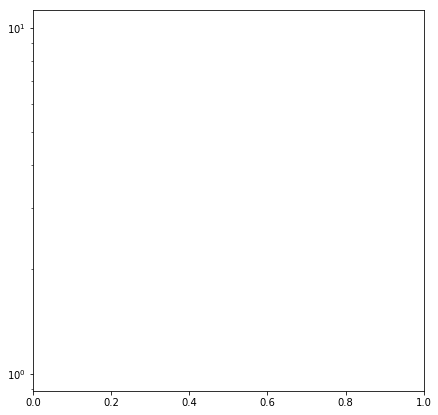

In [59]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale="log")

In [ ]:
df_day.plot()